<a href="https://colab.research.google.com/github/TusharJiShukla/CS-307-Lab-Report/blob/main/Lab_05_In_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install packages directly
install.packages("bnlearn")
install.packages("bnclassify")
install.packages("e1071")
install.packages("randomForest")

# Load the libraries
library(bnlearn)
library(bnclassify)
library(e1071)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘entropy’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘bnclassify’


The following objects are masked from ‘package:bnlearn’:

    modelstring, narcs, nparams



Attaching package: ‘e1071’


The following object is masked from ‘package:bnlearn’:

    impute


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


The following object is masked from ‘package:e1071’:

    element


The following object is masked from ‘package:bnclassify’:

    vars




In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:bnclassify’:

    vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





  Bayesian network parameters

  Parameters of node EC100 (multinomial distribution)

Conditional probability table:
 
     MA101
EC100         AA         AB         BB         BC         CC         CD
   AA 0.75000000 0.07692308 0.03846154 0.01851852 0.00000000 0.00000000
   AB 0.00000000 0.46153846 0.25000000 0.05555556 0.00000000 0.00000000
   BB 0.25000000 0.23076923 0.32692308 0.22222222 0.04081633 0.00000000
   BC 0.00000000 0.15384615 0.28846154 0.27777778 0.32653061 0.00000000
   CC 0.00000000 0.07692308 0.09615385 0.24074074 0.32653061 0.04166667
   CD 0.00000000 0.00000000 0.00000000 0.12962963 0.26530612 0.33333333
   DD 0.00000000 0.00000000 0.00000000 0.03703704 0.04081633 0.50000000
   F  0.00000000 0.00000000 0.00000000 0.01851852 0.00000000 0.12500000
     MA101
EC100         DD          F
   AA 0.00000000 0.00000000
   AB 0.00000000 0.00000000
   BB 0.00000000 0.00000000
   BC 0.00000000 0.00000000
   CC 0.00000000 0.00000000
   CD 0.04761905 0.00000000
   DD 0.190476

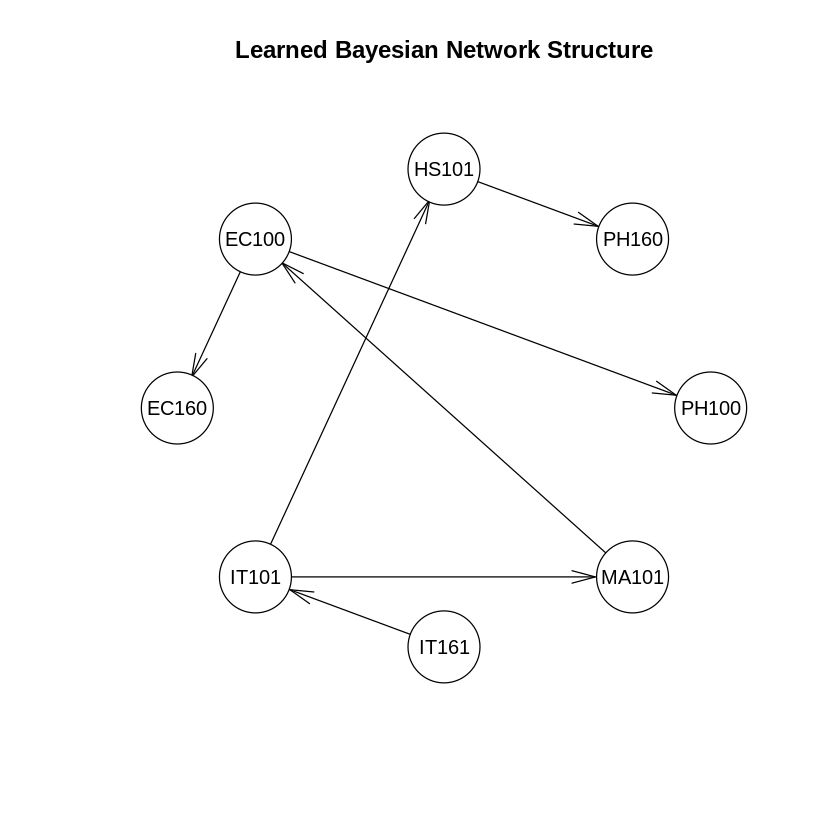

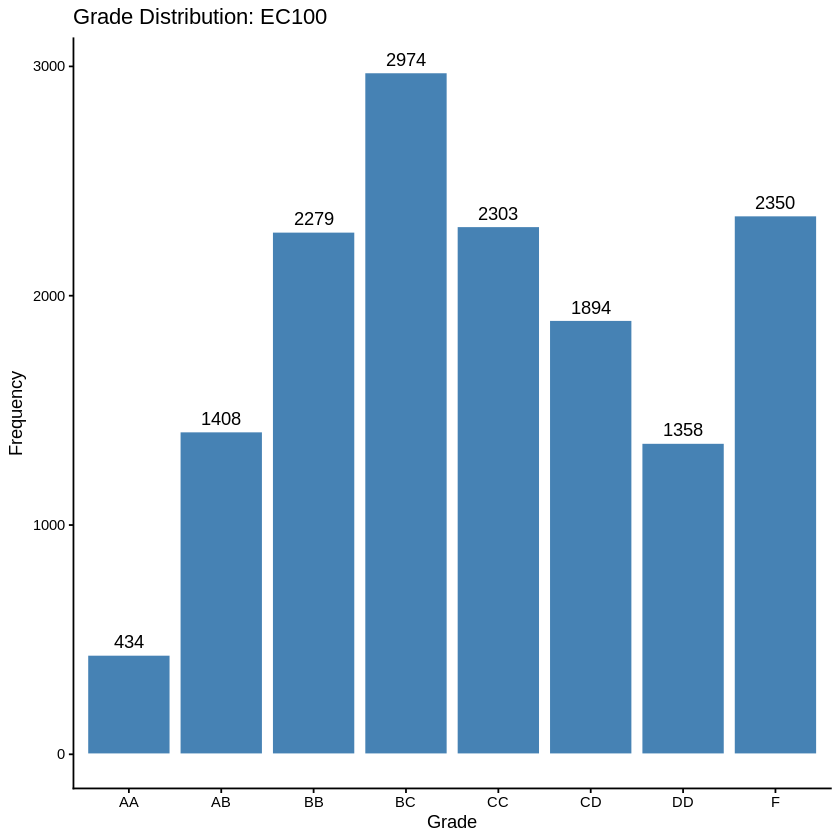

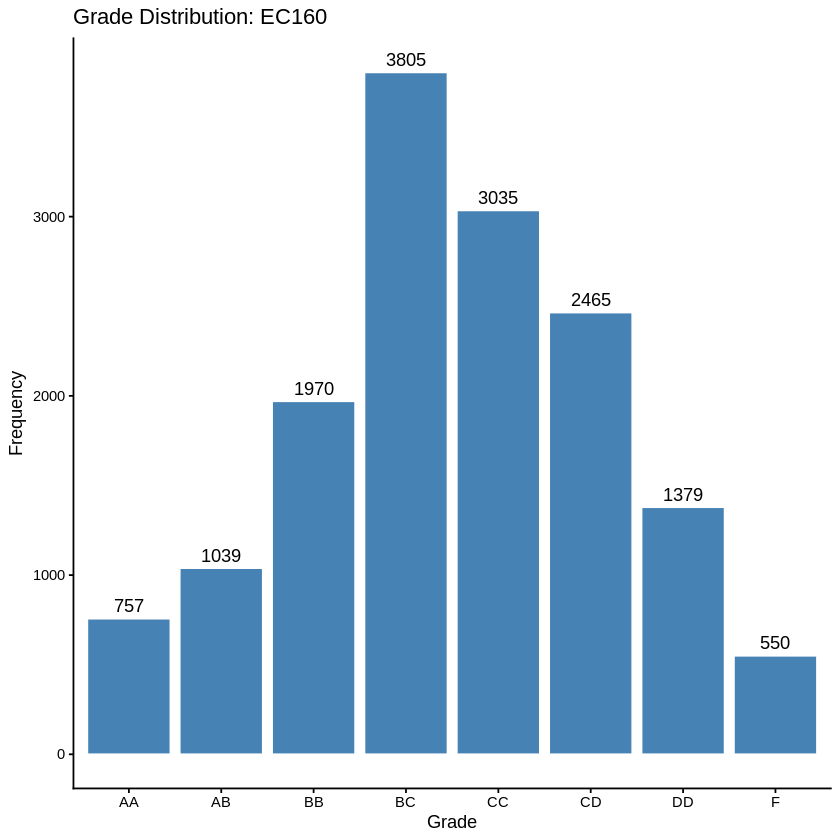

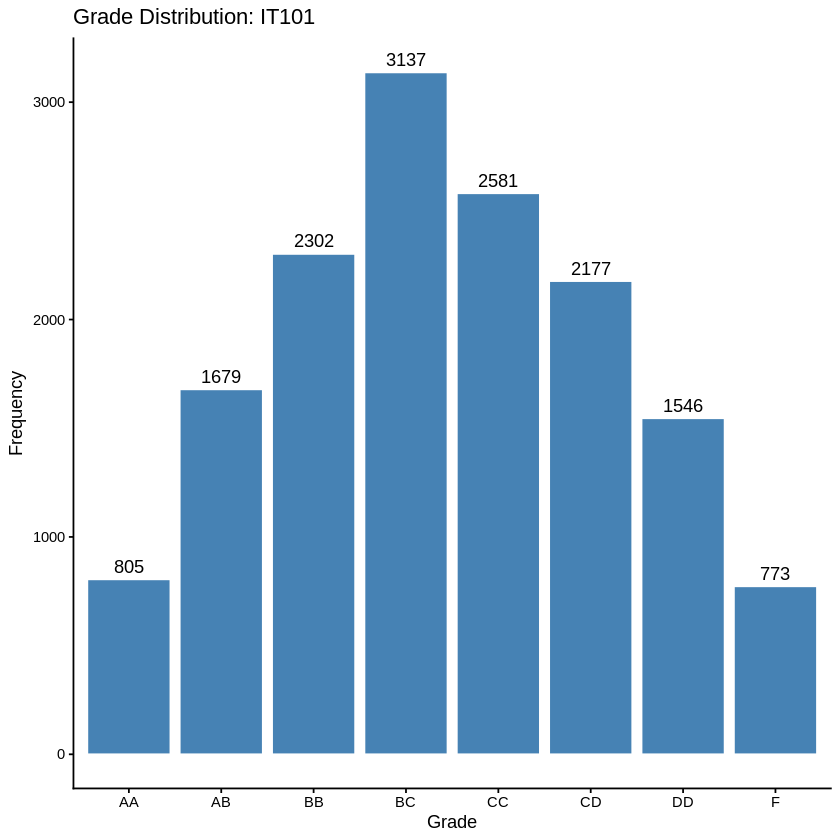

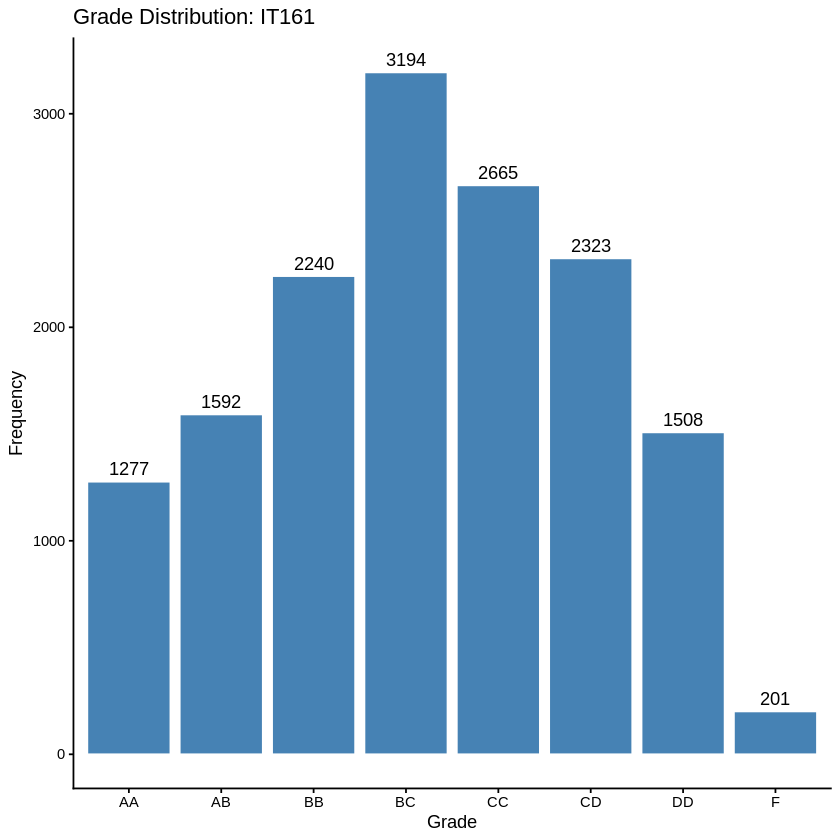

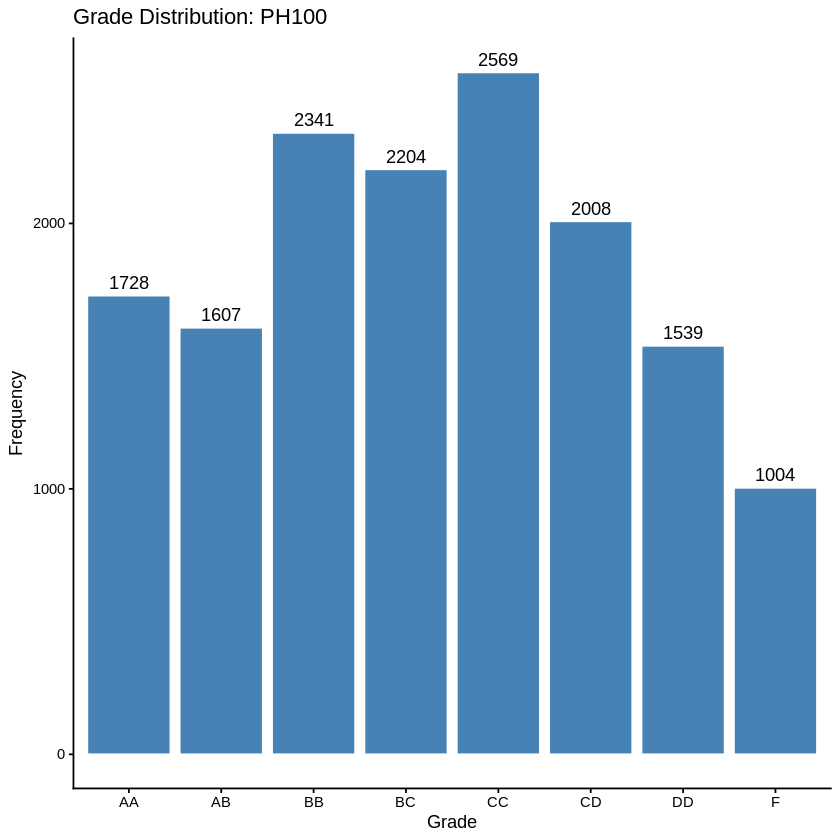

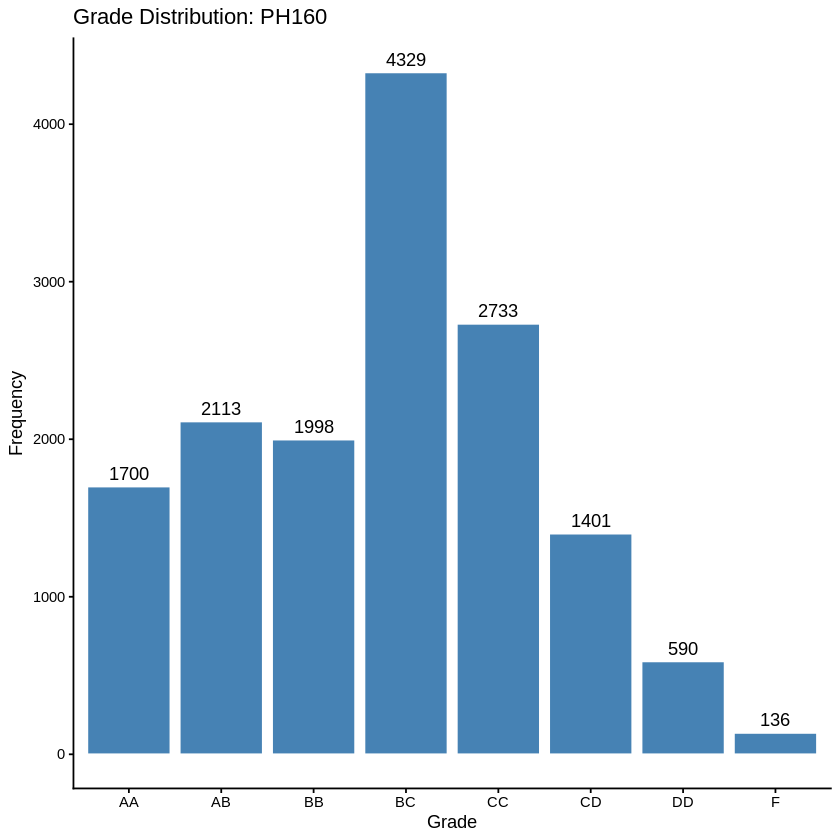

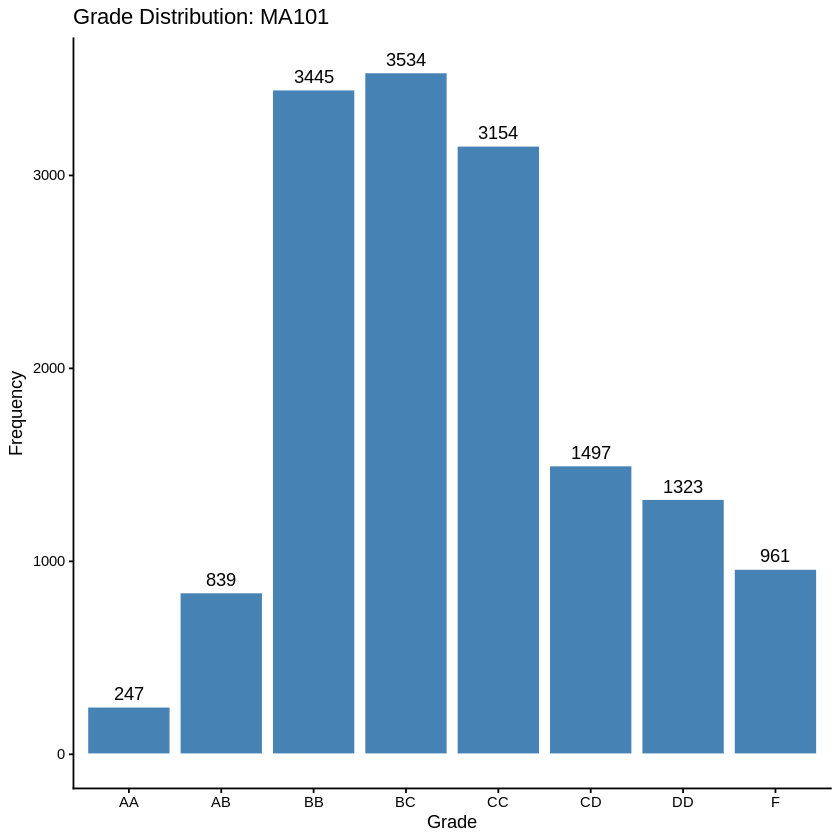

[1] "Predicted PH100 Grade:"
[1] CD
Levels: AA AB BB BC CC CD DD F
[1] "Running Naive Bayes Classification..."
Run 1 Accuracy: 0.9714
Run 2 Accuracy: 0.9857
Run 3 Accuracy: 0.9714
Run 4 Accuracy: 1.0000
Run 5 Accuracy: 0.9857
Run 6 Accuracy: 0.9857
Run 7 Accuracy: 0.9857
Run 8 Accuracy: 0.9857
Run 9 Accuracy: 0.9429
Run 10 Accuracy: 0.9857
Run 11 Accuracy: 0.9714
Run 12 Accuracy: 0.9143
Run 13 Accuracy: 0.9571
Run 14 Accuracy: 0.9714
Run 15 Accuracy: 0.9571
Run 16 Accuracy: 0.9714
Run 17 Accuracy: 0.9571
Run 18 Accuracy: 0.9714
Run 19 Accuracy: 0.9429
Run 20 Accuracy: 0.9714
Mean Naive Bayes Accuracy: 0.9692857 
[1] "Running Random Forest Classification..."
Run 1 Accuracy: 0.9857
Run 2 Accuracy: 0.9714
Run 3 Accuracy: 0.9714
Run 4 Accuracy: 0.9429
Run 5 Accuracy: 0.9571
Run 6 Accuracy: 0.9857
Run 7 Accuracy: 0.9286
Run 8 Accuracy: 0.9429
Run 9 Accuracy: 0.9571
Run 10 Accuracy: 0.9857
Run 11 Accuracy: 0.9857
Run 12 Accuracy: 0.8857
Run 13 Accuracy: 0.9571
Run 14 Accuracy: 0.9286
Run 15 

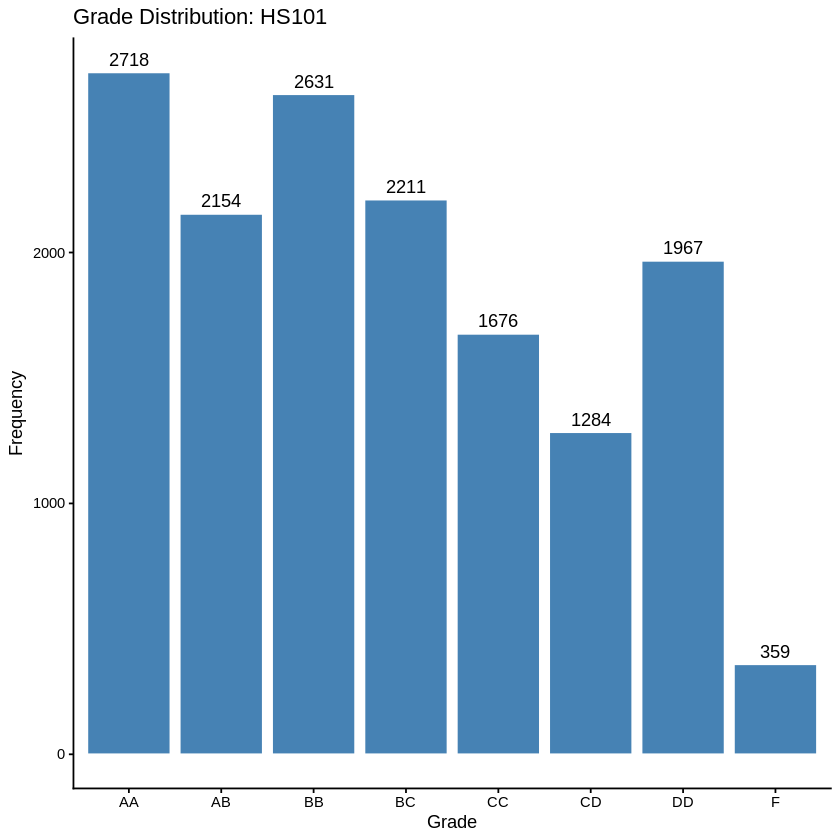

In [ ]:
# Load the dataset from the text file
student_data <- read.table("2020_bn_nb_data.txt", header = TRUE)

categorical_cols <- c("EC100", "EC160", "IT101", "IT161",
                      "MA101", "PH100", "PH160", "HS101", "QP")

student_data[categorical_cols] <- lapply(student_data[categorical_cols], as.factor)

# Learn the network structure using Hill Climbing (K2 score)
bn_structure <- hc(student_data[, -9], score = "k2")

plot(bn_structure, main = "Learned Bayesian Network Structure")

# Fit the probability distributions (CPTs) to the network
fitted_bn <- bn.fit(bn_structure, student_data[, -9])

print(fitted_bn)

subjects <- c("EC100", "EC160", "IT101", "IT161",
              "PH100", "PH160", "MA101", "HS101")

# Generate and print histograms for each subject
for (subj in subjects) {
  # Generate conditional probability distribution data
  dist_data <- data.frame(cpdist(fitted_bn, nodes = subj, evidence = TRUE))

  plot_obj <- ggplot(dist_data, aes(x = .data[[subj]])) +
    geom_bar(fill = "steelblue", color = "white", stat = "count") +
    labs(title = paste("Grade Distribution:", subj),
         x = "Grade",
         y = "Frequency") +
    theme_classic() +
    geom_text(stat = 'count', aes(label = after_stat(count)), vjust = -0.5)

  print(plot_obj)
}

# grades observed for specific subjects
observed_grades <- data.frame(
  EC100 = factor("DD", levels = levels(student_data$EC100)),
  IT101 = factor("CC", levels = levels(student_data$IT101)),
  MA101 = factor("CD", levels = levels(student_data$MA101))
)

# Predict the grade for PH100 based on the evidence using Likelihood Weighting
ph100_prediction <- predict(fitted_bn, node = "PH100", method = "bayes-lw", data = observed_grades)

print(paste("Predicted PH100 Grade:"))
print(ph100_prediction)

runs <- 20
nb_accuracy_scores <- numeric(runs)

print("Running Naive Bayes Classification...")

for (k in 1:runs) {
  set.seed(k)

  shuffled_idx <- sample(nrow(student_data))
  shuffled_data <- student_data[shuffled_idx, ]

  # 70-30 Train-Test Split
  split_point <- round(0.7 * nrow(shuffled_data))
  train_set <- shuffled_data[1:split_point, ]
  test_set <- shuffled_data[(split_point + 1):nrow(shuffled_data), ]

  # Train Naive Bayes model
  nb_model <- naiveBayes(QP ~ ., data = train_set)

  # Predict on test set
  nb_pred <- predict(nb_model, test_set)

  # Calculate accuracy
  acc <- mean(nb_pred == test_set$QP)
  nb_accuracy_scores[k] <- acc

  cat(sprintf("Run %d Accuracy: %.4f\n", k, acc))
}

cat("Mean Naive Bayes Accuracy:", mean(nb_accuracy_scores), "\n")

rf_accuracy_scores <- numeric(runs)
tree_count <- 500

print("Running Random Forest Classification...")

for (k in 1:runs) {
  set.seed(k)

  # Shuffle dataset
  shuffled_idx <- sample(nrow(student_data))
  shuffled_data <- student_data[shuffled_idx, ]

  # 70-30 Train-Test Split
  split_point <- round(0.7 * nrow(shuffled_data))
  train_set <- shuffled_data[1:split_point, ]
  test_set <- shuffled_data[(split_point + 1):nrow(shuffled_data), ]

  # Train Random Forest model
  rf_model <- randomForest(QP ~ ., data = train_set, ntree = tree_count)

  # Predict on test set
  rf_pred <- predict(rf_model, test_set)

  # Calculate accuracy
  acc <- mean(rf_pred == test_set$QP)
  rf_accuracy_scores[k] <- acc

  cat(sprintf("Run %d Accuracy: %.4f\n", k, acc))
}

cat("Mean Random Forest Accuracy:", mean(rf_accuracy_scores), "\n")

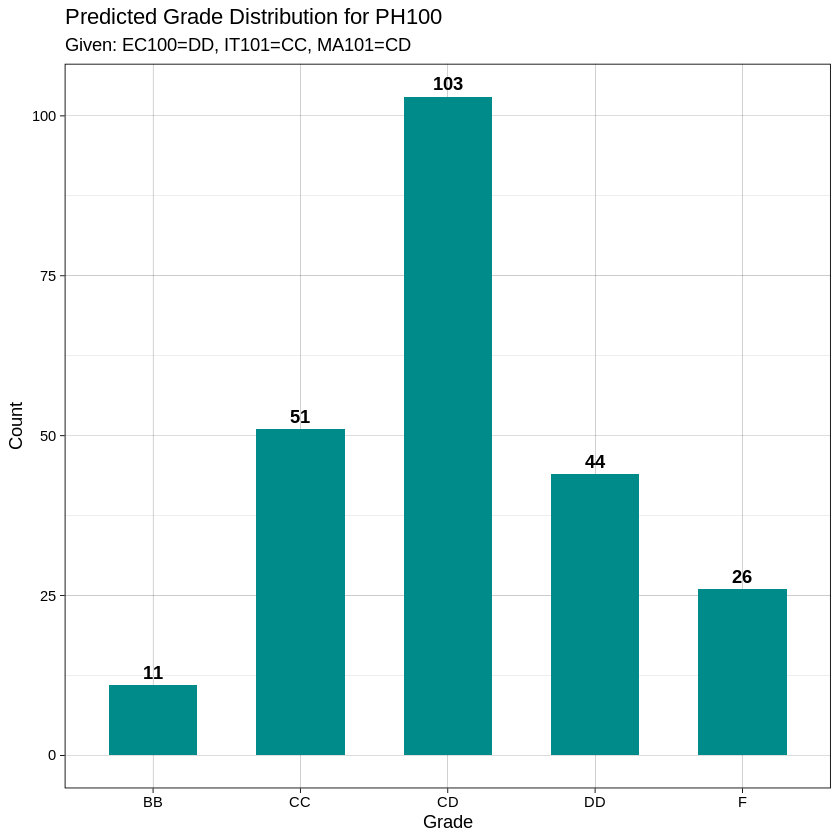

In [ ]:
# Generate random samples for PH100 given the specific evidence
ph100_simulated_data <- data.frame(
  cpdist(fitted_bn,
         nodes = "PH100",
         evidence = (EC100 == "DD" & IT101 == "CC" & MA101 == "CD"))
)

# Aggregate the counts for each grade
ph100_summary <- ph100_simulated_data %>%
  count(PH100, name = "frequency")

ggplot(ph100_summary, aes(x = PH100, y = frequency)) +
  geom_col(fill = "darkcyan", width = 0.6) +
  geom_text(aes(label = frequency), vjust = -0.5, fontface = "bold") +
  labs(title = "Predicted Grade Distribution for PH100",
       subtitle = "Given: EC100=DD, IT101=CC, MA101=CD",
       x = "Grade",
       y = "Count") +
  theme_linedraw()